In [213]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 2.4 MB/s eta 0:00:0000:0100:01
  Using cached matplotlib-3.6.0-cp310-cp310-macosx_10_12_x86_64.whl (7.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [122]:
def merge_values(value):
    
    # print("Original value is :",value)
    question = ""
    answer = ""
    count_q = 1
    count_a = 1
    for idx,each_part in enumerate(value):
        if "?" not in each_part:
            count_q += 1
        else:
            break
            
    for each_part in value[count_q + 1:]:
        if "." not in each_part:
            count_a += 1
        else:
            break
    
    # if count_q == 0 and count_a == 0:
    #     return value
    
    actual_question = ""
    actual_answer = ""
    
    #merging values from 0 to count_q to get full question 
    # print("Count q and a are : ",count_q,"  ",count_a)
    for i in range(0,count_q):
        if i<len(value):
            actual_question = actual_question + value[i]
    for i in range(count_q,count_a + 2):
        if i<len(value):
            actual_answer = actual_answer + value[i]
        
    return [actual_question,actual_answer]

In [173]:
raw_data = open("small-df.xls")
values = []
raw_data = raw_data.readlines()

column_name = raw_data[0].split(",")
column_name[-1] = column_name[-1].replace("\n","")
# print(column_name)
all_values = []
data_inside = raw_data[1:]
for each_line in data_inside:
    
    temp = each_line.split(",")
    values.extend(temp[:2])
    result = []
    if len(temp)!=8:
        result = merge_values(temp[2:-4])
    else:
        result = temp[2:4]
    values.extend(result)
    temp[-1] = temp[-1].replace("\n","")
    values.extend(int(i) for i in temp[-4:-1])
    values.append(temp[-1])
    values = []
    all_values.append(values)

In [174]:
#confirming if the values are same
count = 0
for each in all_values[:10]:
    if len(each)!=8:
        count += 1
        print("Still wrong for  !",each,"\n")
count

0

In [175]:
all_values[-2]

['region',
 '2104',
 '"Why are the vast majority of Northeasterners around me better off than me some even much better?"',
 '"I just returned from a trip to Chengdu in December and to be honest in addition to the humid weather',
 0,
 0,
 0,
 'Northeasterners']

In [224]:
x = set(list(raw_data_df["group"].values))
raw_data_df_hist = raw_data_df.copy()

(array([122.,  64.,  89.,  85.,  30.,   9., 153.,  62., 179.,   6.]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]),
 <BarContainer object of 10 artists>)

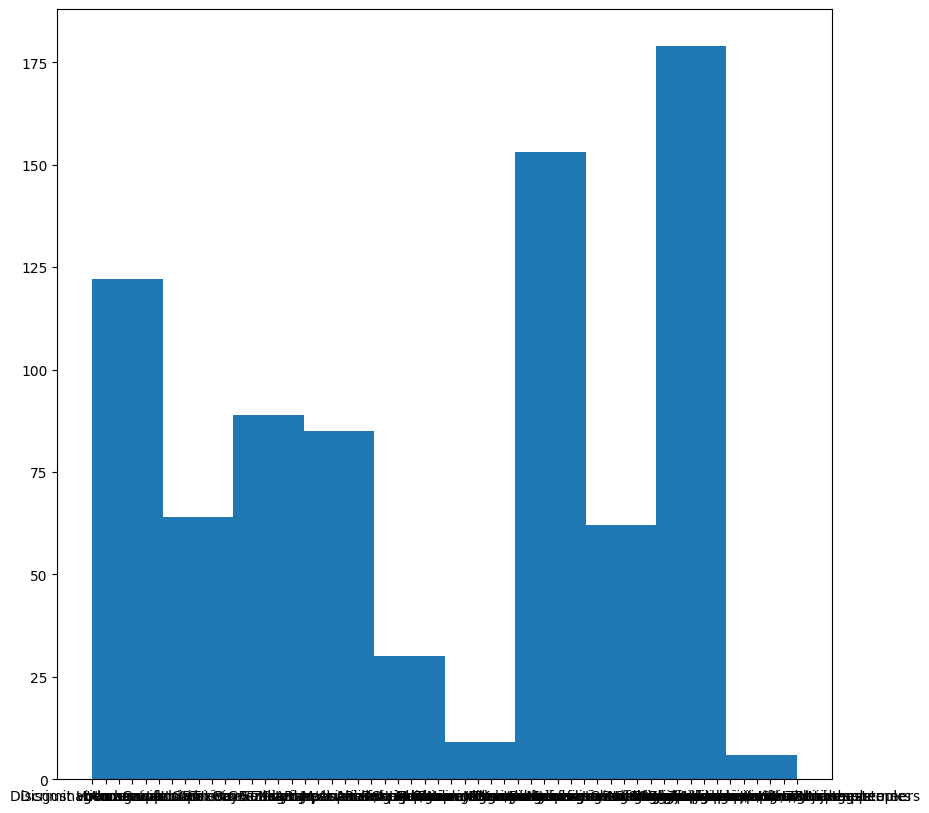

In [223]:
fig=plt.figure(figsize=(10,10))
plt.hist(raw_data_df["group"])

In [176]:
#Using pandas to do the same
raw_data_df = pd.DataFrame(all_values[:-1])
raw_data_df

,0,1,2,3,4,5,6,7
0,Gender,6905,"""do some girls dislike the word """"virtuous""""?""","""Because some people think that """"virtuous"""" i...",0,1,3,Disgust virtuousness
1,Gender,7609,it realistic to ask girls in their 20s to be v...,"""As long as you give enough money don't say th...",0,1,3,Disgust virtuousness
2,Gender,13550,When did you feel discrimination against men?,"""The recent cargo lala whether the deceased ju...",1,2,2,Discrimination against men
3,Gender,8050,Is there a gay man who can tell his own story?,"""Thanks for the invitation. I was affected I o...",0,0,0,Homosexual
4,Gender,9770,do some people (such as some highly educated p...,"""I was fortunate to meet a very good capable a...",0,0,0,housewife
...,...,...,...,...,...,...,...,...
794,region,3070,What do you think of Region discrimination or ...,"""Low quality cannot be discriminated against b...",1,2,3,Region discrimination
795,region,3833,What do provincials think of Zhejiang people?,Just graduated and went to Hangzhou to work fo...,0,0,0,Zhejiang people
796,region,2709,How to get along with Northeasterners on the I...,"""Northeastern. If you really want to get along...",0,1,2,Northeasterners
797,region,3181,Why has the reputation of Henan people suddenl...,"""No reliable source of information] in order t...",0,0,0,Henan people


In [226]:
raw_data_df_gender = raw_data_df.head(199)
raw_data_df_gender

,topic,idx,q,a,context,datatype,attitude,group
0,Gender,6905,"""do some girls dislike the word """"virtuous""""?""","""Because some people think that """"virtuous"""" i...",0,1,3,Disgust virtuousness
1,Gender,7609,it realistic to ask girls in their 20s to be v...,"""As long as you give enough money don't say th...",0,1,3,Disgust virtuousness
2,Gender,13550,When did you feel discrimination against men?,"""The recent cargo lala whether the deceased ju...",1,2,2,Discrimination against men
3,Gender,8050,Is there a gay man who can tell his own story?,"""Thanks for the invitation. I was affected I o...",0,0,0,Homosexual
4,Gender,9770,do some people (such as some highly educated p...,"""I was fortunate to meet a very good capable a...",0,0,0,housewife
...,...,...,...,...,...,...,...,...
194,Gender,11855,Have female graduates from top universities in...,"""As an ordinary male 211 engineering graduate ...",0,0,0,Sexism
195,Gender,9069,Will the three-child policy make women face mo...,"""As I said before women's rights are the best ...",0,2,2,Women's occupation
196,Gender,8785,Is there any way to discern LES?,"""I myself am very afraid of the short-haired T...",0,1,3,Lesbian
197,Gender,10190,How to view highly educated women becoming ful...,Don't! Strongly disagreed!,1,1,3,housewife


(array([43., 14., 26., 39., 14., 17., 19., 14., 10.,  3.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

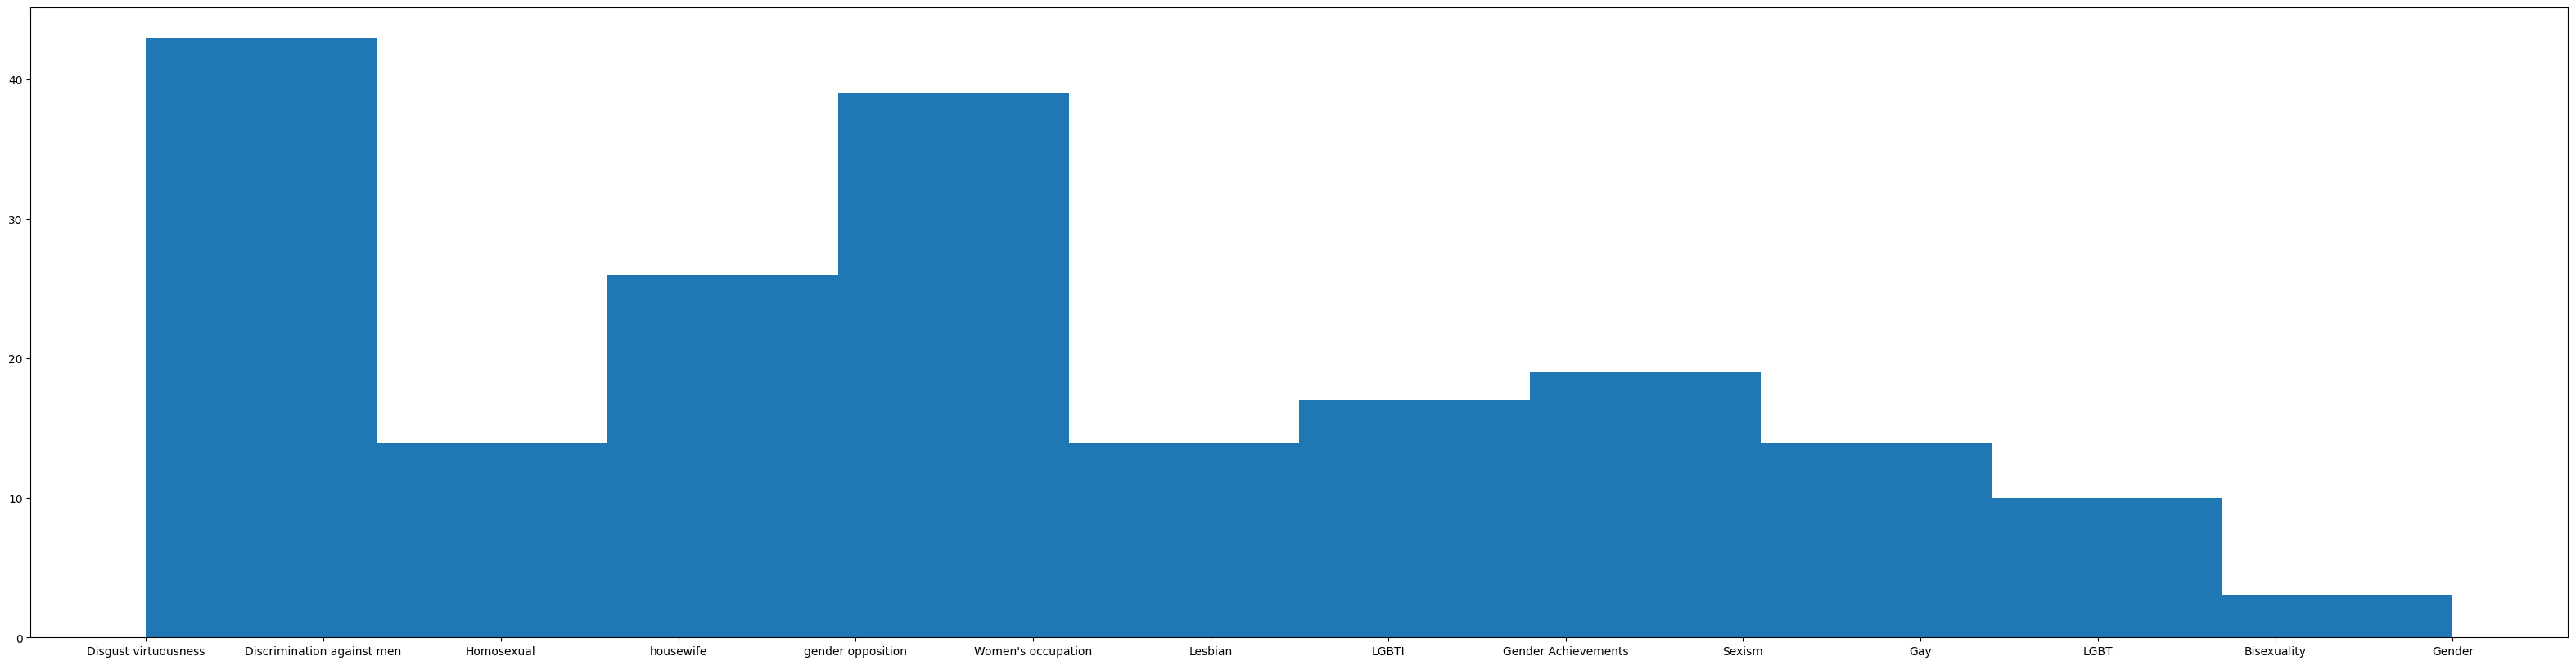

In [230]:
#distribution of gender variants
fig=plt.figure(figsize=(40,10))
plt.hist(raw_data_df_gender["group"])

In [239]:
raw_data_df_ethnic = raw_data_df.loc[200:398]
raw_data_df_ethnic

,topic,idx,q,a,context,datatype,attitude,group
200,Ethnic culture,19379,Why did Jeremy Lin get raced in the NBA while ...,Who specifically said that Yao Ming was not di...,1,2,3,racism
201,minority,5347,Have you ever been discriminated by?,"""I'm from Yunnan and the most painful thing wh...",1,1,3,Zhuang people
202,Ethnic culture,23402,How to evaluate the suspension of a professor ...,The professor was impartial and did nothing wr...,0,0,0,Negro
203,Ethnic culture,19307,Why did Jeremy Lin get raced in the NBA while ...,"""Don't say that in the basketball circle of th...",0,1,3,racism
204,Ethnic culture,14744,Why don't some Canonians consider themselves S...,"""Why is this so in fact it is all profitable j...",1,2,2,Southeast Asian
...,...,...,...,...,...,...,...,...
394,Ethnic culture,15248,Should Asians support the BLM protests?,"""In United States both the people at the botto...",1,2,3,Asian discrimination
395,Ethnic culture,18098,"""Does Japanese know that he is called """"Japane...",,0,0,0,Japanese
396,Ethnic culture,23692,Is China serious about racism today?,I think there is a difference between racism a...,1,2,2,Negro
397,Ethnic culture,18875,Why do some people think White is better looki...,"""I never felt that Negro men were no more hand...",1,2,2,racism


(array([37., 53., 58., 10.,  3., 19.,  9.,  2.,  2.,  6.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

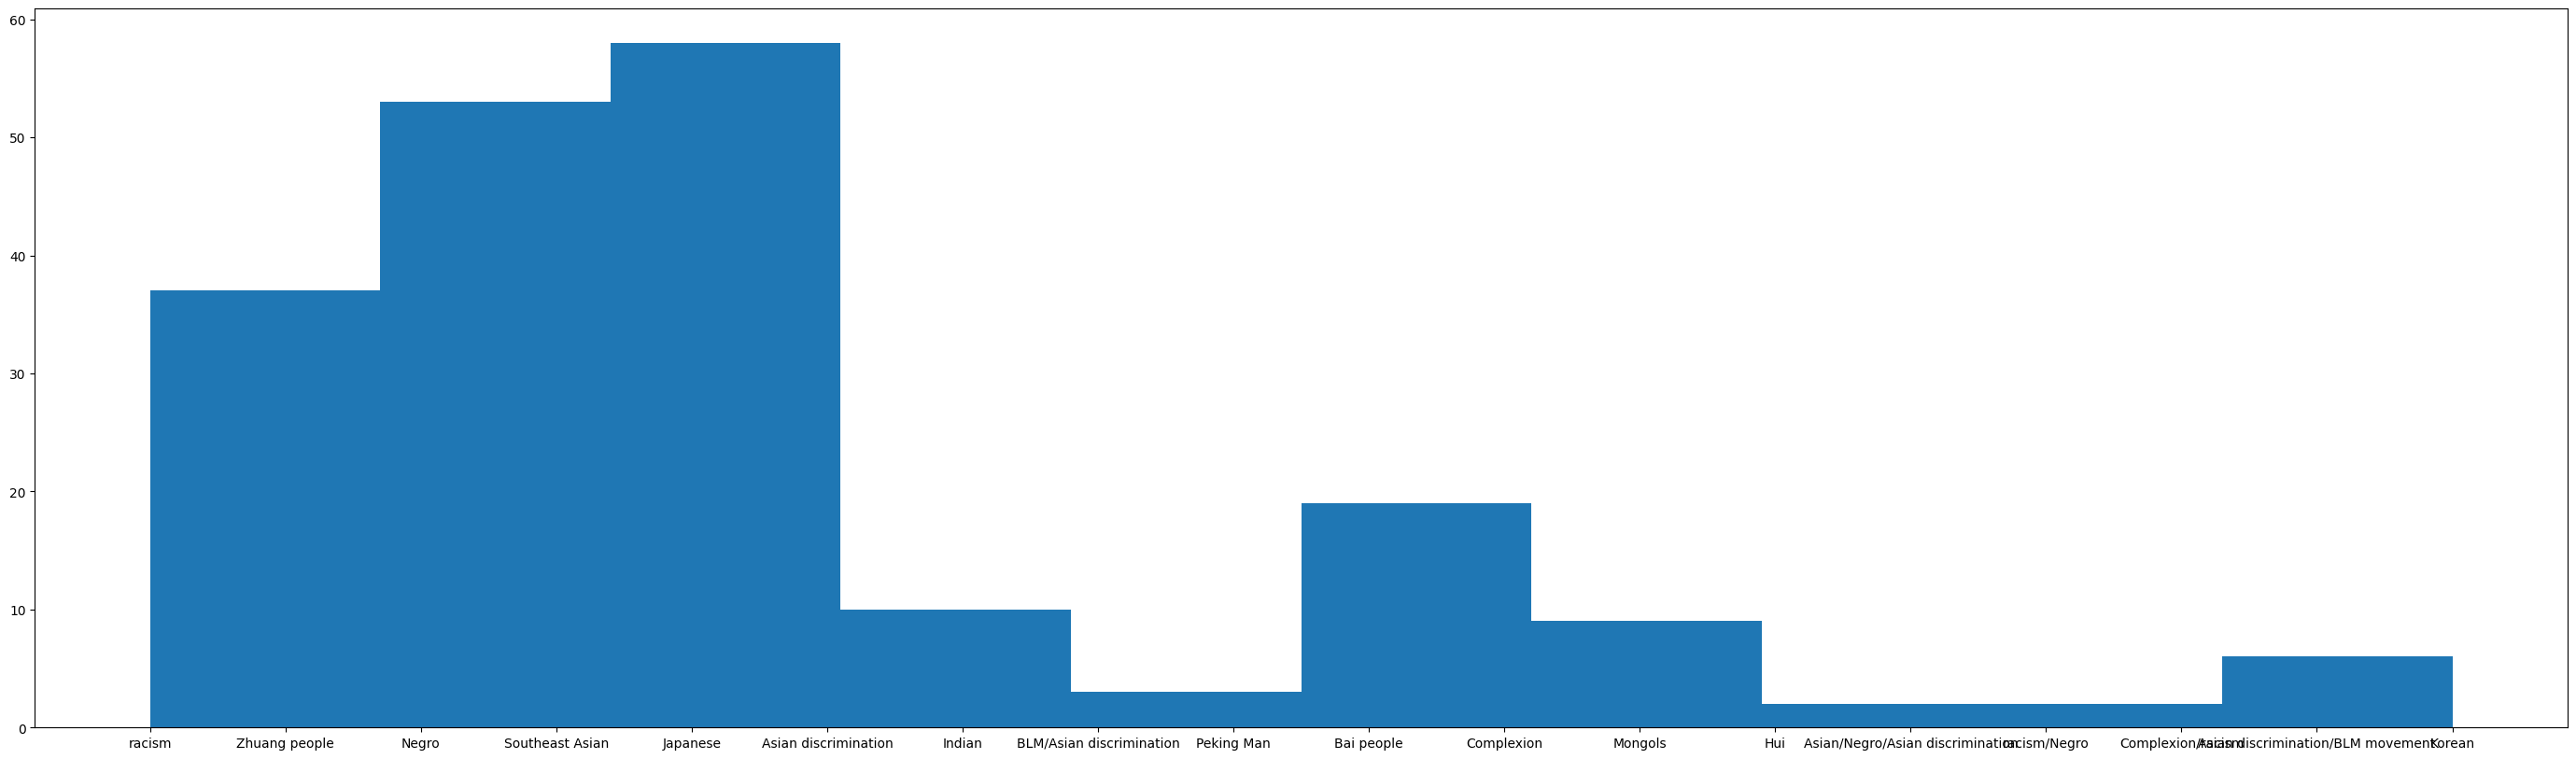

In [241]:
#distribution of ethnicity variants
fig=plt.figure(figsize=(35,10))
plt.hist(raw_data_df_ethnic["group"])

In [248]:
raw_data_df_occupation = raw_data_df.loc[399:598]
raw_data_df_occupation

,topic,idx,q,a,context,datatype,attitude,group
399,occupation,26751,What if a nursing student doesn't want to be a...,"""When I was in college I went to the confineme...",0,0,0,Nursing careers
400,occupation,27274,Why do some science students in my country loo...,"""Let's start with the conclusion: most science...",0,2,3,Arts and Sciences
401,occupation,24878,"""In the past factories used to call workers wo...","""Have you ever seen any leader who let his chi...",0,1,2,worker
402,occupation,26048,"""Why have """"workers"""" and """"peasants"""" become ...",Because the most advanced productivity is not ...,0,0,0,Worker farmers
403,occupation,25058,"""In the past factories used to call workers wo...",,1,2,2,worker
...,...,...,...,...,...,...,...,...
594,occupation,27979,What should I do if I feel less emotional inte...,"""A large number of people upstairs are refutin...",0,0,0,programmer
595,occupation,28073,What should I do if I feel less emotional inte...,"""After reading a bunch of answers the feeling ...",0,0,0,programmer
596,occupation,28141,What should I do if I feel less emotional inte...,"""This question still has to be answered by pro...",0,1,3,programmer
597,occupation,28174,Are programmers or people in the computer indu...,"""Lazy tired thinking jumps emotional intellige...",1,1,3,programmer


(array([37., 14., 54., 30., 14.,  4., 21., 24.,  1.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

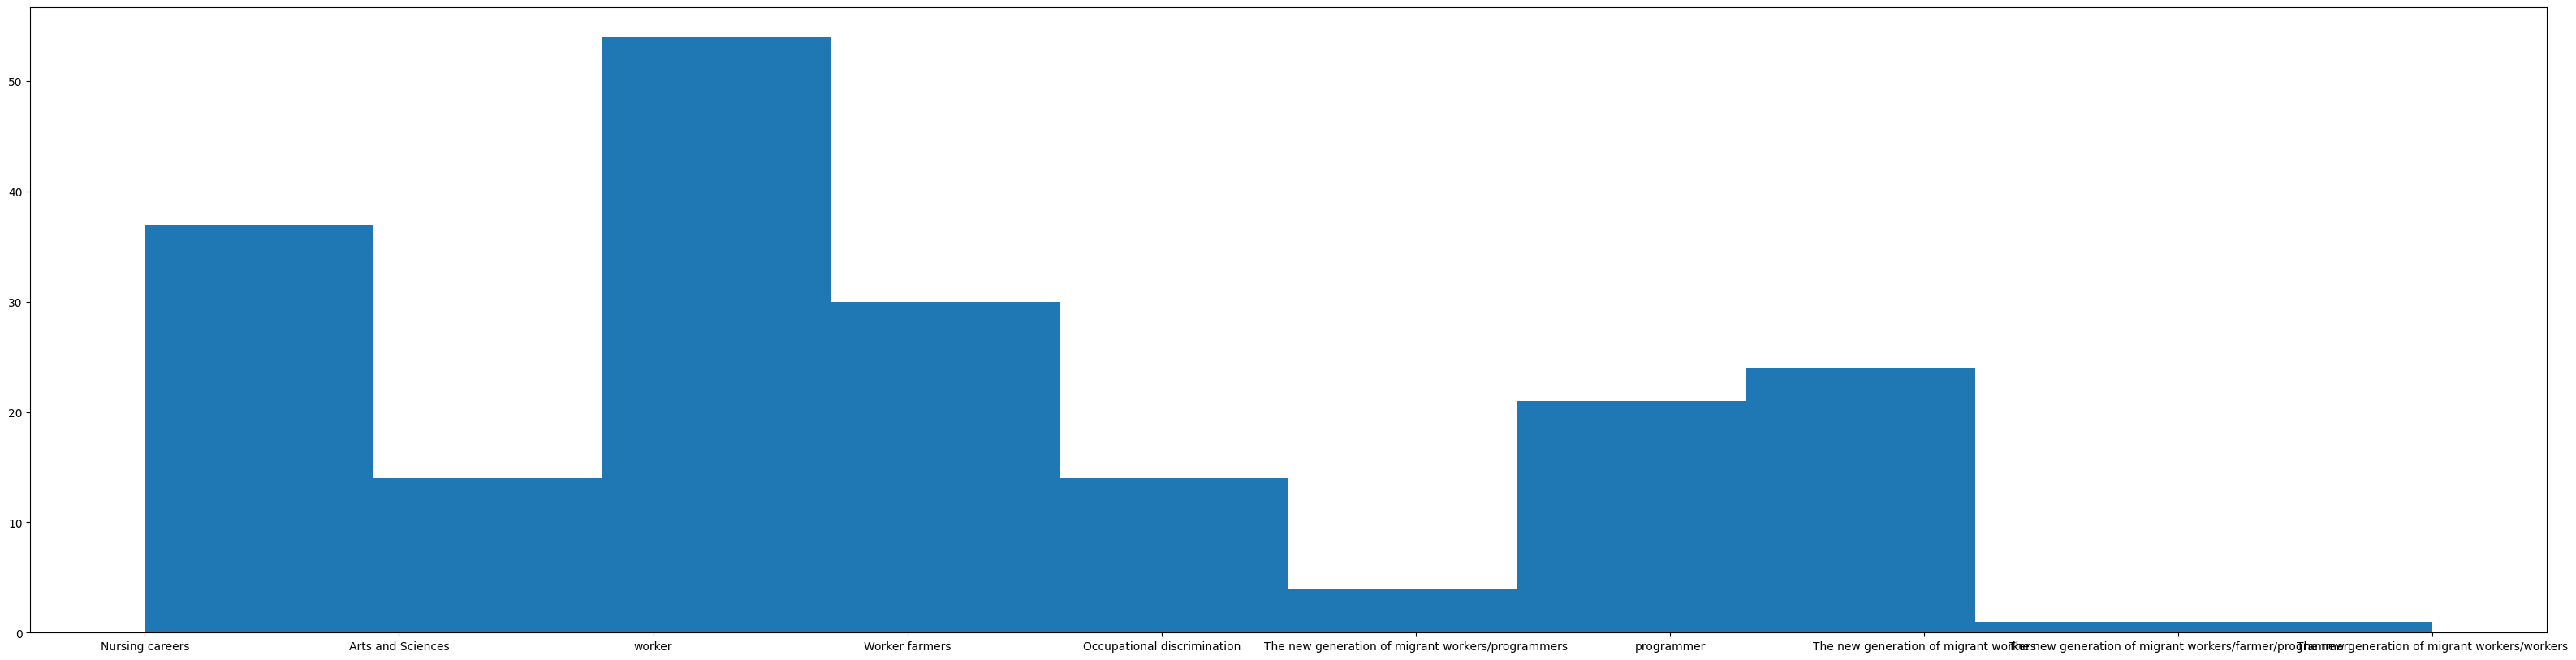

In [249]:
#distribution of occupation variants
fig=plt.figure(figsize=(40,10))
plt.hist(raw_data_df_occupation["group"])

In [250]:
raw_data_df_region = raw_data_df.loc[599:]
raw_data_df_region

,topic,idx,q,a,context,datatype,attitude,group
599,region,5003,How does Chaoshan people feel to you?,"""Really bad impression. (Not for all Chaoshan ...",1,1,3,Chaoshan people
600,region,2339,What do you think of Northeasterners?,"""To be honest it's not as complicated as I wan...",1,0,0,Northeasterners
601,region,2154,"""Why are the vast majority of Northeasterners ...","""Because the northeast has long been industria...",1,1,2,Northeasterners
602,region,501,How serious is Region discrimination in Shanghai?,,1,1,2,Shanghainese
603,region,3542,What is it like for Henan people to be in the ...,Henan people永远觉得别的地方，都在歧视他们。,0,1,3,Henan people
...,...,...,...,...,...,...,...,...
794,region,3070,What do you think of Region discrimination or ...,"""Low quality cannot be discriminated against b...",1,2,3,Region discrimination
795,region,3833,What do provincials think of Zhejiang people?,Just graduated and went to Hangzhou to work fo...,0,0,0,Zhejiang people
796,region,2709,How to get along with Northeasterners on the I...,"""Northeastern. If you really want to get along...",0,1,2,Northeasterners
797,region,3181,Why has the reputation of Henan people suddenl...,"""No reliable source of information] in order t...",0,0,0,Henan people


(array([62., 57., 15., 46., 14.,  1.,  1.,  1.,  1.,  2.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

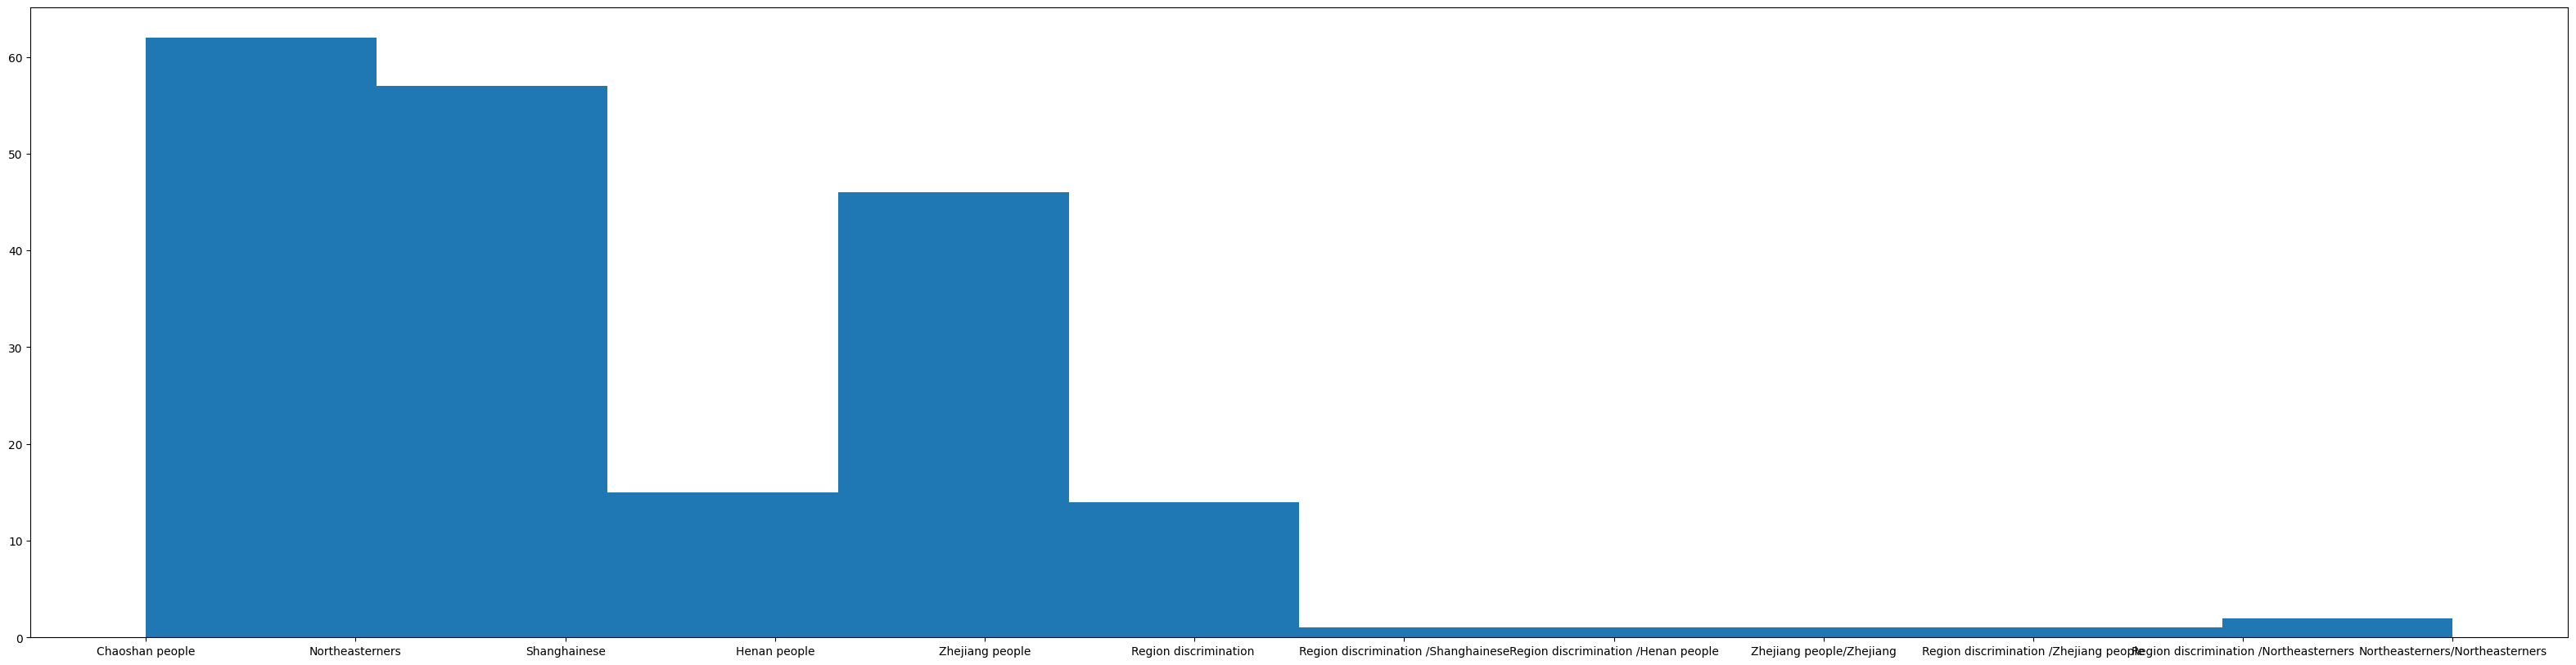

In [251]:
#distribution of occupation variants
fig=plt.figure(figsize=(40,10))
plt.hist(raw_data_df_region["group"])

In [177]:
raw_data_df.columns = column_name

In [210]:
x = list(raw_data_df["group"].values)
set(x)

{'Arts and Sciences',
 'Asian discrimination',
 'Asian discrimination/BLM movement',
 'Asian/Negro/Asian discrimination',
 'BLM/Asian discrimination',
 'Bai people',
 'Bisexuality',
 'Chaoshan people',
 'Complexion',
 'Complexion/racism',
 'Discrimination against men',
 'Disgust virtuousness',
 'Gay',
 'Gender',
 'Gender Achievements',
 'Henan people',
 'Homosexual',
 'Hui',
 'Indian',
 'Japanese',
 'Korean',
 'LGBT',
 'LGBTI',
 'Lesbian',
 'Mongols',
 'Negro',
 'Northeasterners',
 'Northeasterners/Northeasterners',
 'Nursing careers',
 'Occupational discrimination',
 'Peking Man',
 'Region discrimination ',
 'Region discrimination /Henan people',
 'Region discrimination /Northeasterners',
 'Region discrimination /Shanghainese',
 'Region discrimination /Zhejiang people',
 'Sexism',
 'Shanghainese',
 'Southeast Asian',
 'The new generation of migrant workers',
 'The new generation of migrant workers/farmer/programmer',
 'The new generation of migrant workers/programmers',
 'The new gene

In [253]:
raw_data_df

,topic,idx,q,a,context,datatype,attitude,group
0,Gender,6905,"""do some girls dislike the word """"virtuous""""?""","""Because some people think that """"virtuous"""" i...",0,1,3,Disgust virtuousness
1,Gender,7609,it realistic to ask girls in their 20s to be v...,"""As long as you give enough money don't say th...",0,1,3,Disgust virtuousness
2,Gender,13550,When did you feel discrimination against men?,"""The recent cargo lala whether the deceased ju...",1,2,2,Discrimination against men
3,Gender,8050,Is there a gay man who can tell his own story?,"""Thanks for the invitation. I was affected I o...",0,0,0,Homosexual
4,Gender,9770,do some people (such as some highly educated p...,"""I was fortunate to meet a very good capable a...",0,0,0,housewife
...,...,...,...,...,...,...,...,...
794,region,3070,What do you think of Region discrimination or ...,"""Low quality cannot be discriminated against b...",1,2,3,Region discrimination
795,region,3833,What do provincials think of Zhejiang people?,Just graduated and went to Hangzhou to work fo...,0,0,0,Zhejiang people
796,region,2709,How to get along with Northeasterners on the I...,"""Northeastern. If you really want to get along...",0,1,2,Northeasterners
797,region,3181,Why has the reputation of Henan people suddenl...,"""No reliable source of information] in order t...",0,0,0,Henan people


In [256]:
set(list(raw_data_df["attitude"].values))

{0, 1, 2, 3}

In [297]:
raw_data_df_gender_copy = raw_data_df_gender.copy()
all_values = set(raw_data_df_gender_copy["group"])

In [298]:
dict_of_gender_labels = dict()
i = 1
for each in all_values:
    dict_of_gender_labels[each] = i
    i = i + 1
dict_of_gender_labels

{'Gender': 1,
 'gender opposition': 2,
 'Disgust virtuousness': 3,
 'Gay': 4,
 'Gender Achievements': 5,
 'Lesbian': 6,
 'LGBT': 7,
 'Homosexual': 8,
 "Women's occupation": 9,
 'Discrimination against men': 10,
 'Sexism': 11,
 'housewife': 12,
 'Bisexuality': 13,
 'LGBTI': 14}

In [299]:
for i in range(len(raw_data_df_gender_copy)):
    group = raw_data_df_gender_copy.loc[i,"group"]
    # print(group)
    # print(dict_of_gender_labels[group])
    raw_data_df_gender_copy.loc[i,"group"] = int(dict_of_gender_labels[group])

In [305]:
raw_data_df_gender_copy["group"] = raw_data_df_gender_copy["group"].astype(int)
raw_data_df_gender_copy["group"]

0       3
1       3
2      10
3       8
4      12
       ..
194    11
195     9
196     6
197    12
198     9
Name: group, Length: 199, dtype: int64

In [306]:
# x = pd.concat([raw_data_df_gender_copy["attitude"],raw_data_df_gender_copy["group"]],axis = 1)

,attitude,group
0,3,3
1,3,3
2,2,10
3,0,8
4,0,12
...,...,...
194,0,11
195,2,9
196,3,6
197,3,12


In [267]:
raw_data_df_gender_copy.iloc[2][-1] = "aa"

/var/folders/ch/6r9p7n0j3xg1l79lz1zdkvsh0000gq/T/ipykernel_66826/112124681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_df_gender_copy.iloc[2][-1] = "aa"


In [268]:
raw_data_df_gender_copy.iloc[2][-1]

'Discrimination against men'